In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df = pd.read_csv("marketing_sales.csv") 

In [6]:
print(df.shape)
df.head(4)

(1676, 9)


,Date,Brand Name,Country,Gross Sales,Net Sales,Total Sales,Total Ad Spend,Order Count,Return Amount
0,12/1/2023,Brand A,India,741965.00,81590.00,84590.0,7731.0,16,84765
1,12/1/2023,Brand B,India,436999.88,397480.70,437840.0,6549.0,30,11964
2,12/1/2023,Brand B,India,356610.67,326684.67,361550.0,4583.0,19,6671
3,12/1/2023,Brand C,India,313971.46,313971.46,332050.0,3610.0,28,5420


## Basic Data Cleaning

In [9]:
df.columns = df.columns.str.strip()
# convert date
df['Date'] = pd.to_datetime(df['Date'])
# check missing values
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 Date              0
Brand Name        0
Country           0
Gross Sales       0
Net Sales         0
Total Sales       0
Total Ad Spend    0
Order Count       0
Return Amount     0
dtype: int64


## Correlation Matrix

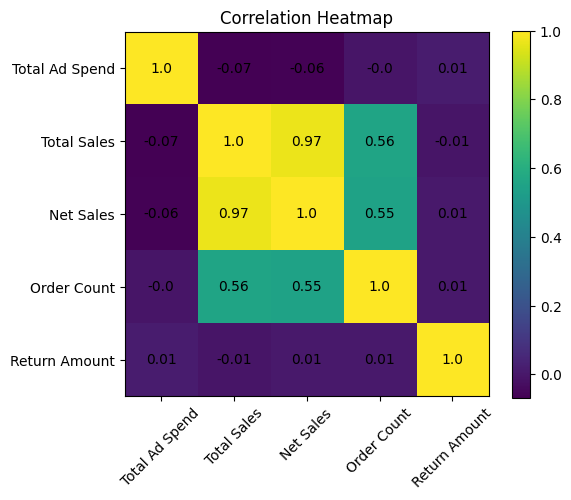

In [13]:
cols = ['Total Ad Spend','Total Sales','Net Sales','Order Count','Return Amount']
corr = df[cols].corr()
plt.figure(figsize=(6,5))

plt.imshow(corr, interpolation='nearest')
plt.colorbar()

plt.xticks(range(len(cols)), cols, rotation=45)
plt.yticks(range(len(cols)), cols)

# show numbers inside boxes
for i in range(len(cols)):
    for j in range(len(cols)):
        plt.text(j, i, round(corr.iloc[i, j], 2),
                 ha='center', va='center')

plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### Correlation Insights
1.Ad Spend shows negligible correlation (-0.07) with Sales

2.Order Count shows moderate positive correlation (0.56) with Sales

3.Net Sales and Total Sales are strongly correlated (0.97) as expected

4.Returns have minimal impact

## Scatter Plot (Ad Spend vs Sales)

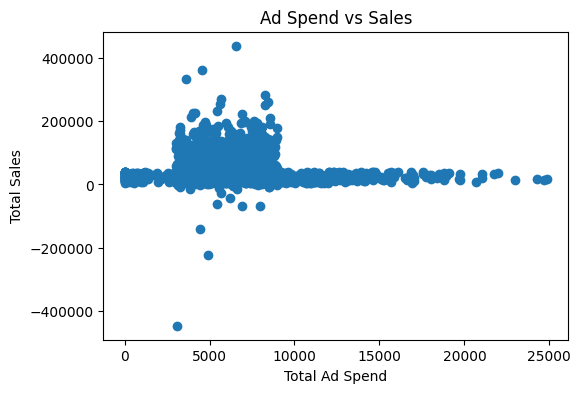

In [14]:
plt.figure(figsize=(6,4))
plt.scatter(df['Total Ad Spend'], df['Total Sales'])
plt.xlabel("Total Ad Spend")
plt.ylabel("Total Sales")
plt.title("Ad Spend vs Sales")
plt.show()

| Feature                 | Correlation           | Causal Reasoning         |
| ----------------------- | --------------------- | ------------------------ |
| Purpose                 | Measure association   | Explain cause-effect     |
| Shows                   | Strength of relation  | Why relation exists      |
| Controls variables?     | No                    |   Yes                    |
| Example in your data    | Ad spend & sales weak | Order count drives sales |
| Reliable for decisions? | Limited               | Strong                   |


Correlation analysis showed almost no relationship (-0.07) between advertising spend and sales, indicating that higher spending does not necessarily lead to higher revenue. However, correlation alone cannot establish causation because other variables such as order count, brand strength, and seasonality may influence both ad spend and sales. Through causal reasoning and controlled regression analysis, it becomes evident that operational factors like order volume have a stronger impact on sales than advertising expenditure. Therefore, correlation should not be interpreted as causation without accounting for confounding variables.

## What is a confounder

A third variable that affects both X and Y, creating a misleading relationship.
Confounder → Ad Spend
Confounder → Sales
So it looks like:
Ad Spend → Sales   (but actually false)

| Confounder  | Why it affects Sales          | Why it affects Ad Spend          |
| ----------- | ----------------------------- | -------------------------------- |
| Order Count | More purchases → more revenue | High demand → more ads           |
| Brand Name  | Popular brands sell more      | Big brands spend more            |
| Seasonality | Festivals boost demand        | Companies advertise more         |
| Country     | Regional demand differences   | Regional marketing budgets       |
| Returns     | Reduces net sales             | May influence marketing strategy |

Several confounding variables may influence the relationship between advertising spend and sales. Order count directly drives revenue and shows a stronger correlation with sales than advertising. Brand popularity also affects both marketing budgets and customer purchases. Seasonal trends and regional differences further impact demand and advertising levels simultaneously. These variables create indirect relationships that can falsely suggest that ad spending causes sales. Therefore, controlling for confounders through regression or experimental methods is necessary before drawing causal conclusions.